In [1]:
import sys
sys.path.append('/content/drive/MyDrive/Glaucoma_Detection')
sys.path.append('/content/drive/MyDrive/Glaucoma_Detection/utils')

In [ ]:
from Model_Architecture import *

# Patch Extraction

In [ ]:
from utils.extract_patches import get_data_train
import numpy as np

In [ ]:
data_path_list = "/content/drive/MyDrive/Glaucoma_Detection/Dataset_Preparation/data_path_list/IDRiD/train.txt"
patch_height, patch_width = 128, 128
stride_height, stride_width = 48, 48

patches_imgs_train, patches_masks_train = get_data_train(
    data_path_list, patch_height, patch_width, stride_height, stride_width)

print(patches_imgs_train.shape, patches_masks_train.shape)

load data from /content/drive/MyDrive/Glaucoma_Detection/Dataset_Preparation/data_path_list/IDRiD/train.txt 
ori data shape < ori_imgs:(54, 3, 1112, 1012) GTs:(54, 1, 1112, 1012)
imgs pixel range 0-255: 
GTs pixel range 0-255: 
==================data have loaded======================

the side H is not compatible with the selected stride of 48
(img_h - patch_h) MOD stride_h: 24
So the H dim will be padded with additional 24 pixels
the side W is not compatible with the selected stride of 48
(img_w - patch_w) MOD stride_w: 20
So the W dim will be padded with additional 28 pixels
new padded images shape: (54, 1, 1136, 1040)

the side H is not compatible with the selected stride of 48
(img_h - patch_h) MOD stride_h: 24
So the H dim will be padded with additional 24 pixels
the side W is not compatible with the selected stride of 48
(img_w - patch_w) MOD stride_w: 20
So the W dim will be padded with additional 28 pixels
new padded images shape: (54, 1, 1136, 1040)

Train images shape: (54, 1

In [ ]:
import matplotlib.pyplot as plt

for i in range(100):
  plt.imshow(patches_imgs_train[i,0,:,:], cmap="gray")
  plt.show()
  plt.imshow(patches_masks_train[i,0,:,:], cmap="gray")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
from PIL import Image
import numpy as np

img_path = "/content/drive/MyDrive/Glaucoma_Detection/Dataset/Drishti/Training/Images/drishtiGS_042.png"
GT_path_1 = "/content/drive/MyDrive/Glaucoma_Detection/Dataset/Drishti/Training/GT/drishtiGS_042/SoftMap/drishtiGS_042_ODsegSoftmap.png"
GT_path_2 = "/content/drive/MyDrive/Glaucoma_Detection/Dataset/Drishti/Training/GT/drishtiGS_042/SoftMap/drishtiGS_042_cupsegSoftmap.png"

img = np.asarray(Image.open(img_path))
GT_1, GT_2 = np.asarray(Image.open(GT_path_1)), np.asarray(Image.open(GT_path_2))

GT_1 = np.where(GT_1 ==255, 1, 0)
GT_2 = np.where(GT_2 ==255, 1, 0)

GT = GT_1 + GT_2

img.shape, GT.shape

((1750, 2050, 3), (1750, 2050))

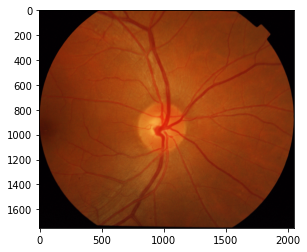

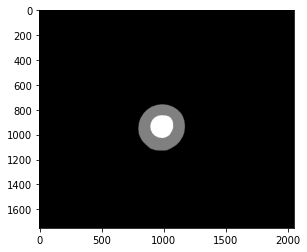

(array([0, 1]), array([0, 1]))

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()
plt.imshow(GT, cmap="gray")
plt.show()
# plt.imshow(GT_2, cmap="gray")
# plt.show()

np.unique(GT_1), np.unique(GT_2)

In [28]:
im = (255./2 * GT).astype(np.uint8)
im = Image.fromarray(im)
im.save("/content/drive/MyDrive/Glaucoma_Detection/Dataset/GT.jpg")

In [27]:
GT.shape

(1750, 2050)

In [29]:
img_path = "/content/drive/MyDrive/Glaucoma_Detection/Dataset/IDRiD/Training/Images/IDRiD_04.jpg"
img = np.asarray(Image.open(img_path))
img.shape

(2848, 4288, 3)